# Python Learning & Exam Performance Data

## Introduction
This dataset contains simulated learning activity data from 3,000 students studying Python. It is designed for machine learning tasks such as exam score prediction, pass/fail classification, student performance analytics, and educational insights.

## Dataset Source
This dataset was synthetically generated for educational and research use. No real student information is included.

## Contents
The dataset includes demographics, learning habits, engagement metrics, and final exam

## Goal
Perform exploratory analysis and try to predict
* final exam score (_final_exam_score_ variable)
* if exam is passed (_passed_exam_ variable)
 results.
## Columns Description

| Column (Variable) | Description |
| :---------------------- | :---------------------------------------------------------------------------------------------------- |
| **student_id** | Unique identifier for each student |
| **age** | Age of learner (16–55) |
| **country** | Country of the student (India, Bangladesh, USA, UK, etc.) |
| **prior_programming_experience** | Level of programming experience before starting Python |
| **weeks_in_course** | How many weeks the student has been enrolled (1–15) |
| **hours_spent_learning_per_week** | Average number of hours spent learning Python each week |
| **practice_problems_solved** | Number of solved coding challenges |
| **projects_completed** | Count of completed Python projects |
| **tutorial_videos_watched** | Number of Python-related videos watched |
| **uses_kaggle** | Whether the student uses Kaggle (1 = yes) |
| **participates_in_discussion_forums** | Whether the student participates in forums |
| **debugging_sessions_per_week** | Frequency of debugging sessions |
| **self_reported_confidence_python** | Confidence in Python (1–10 scale) |
| **final_exam_score** | Final exam score percentage (0–100) |
| **passed_exam** | Exam pass indicator (1 = passed, 0 = failed) |d, 0 = failed)sults.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
# from IPython.display import display, HTML
import os
import datetime
# from pandas.tseries.offsets import DateOffset
# import statsmodels.api as sm
# from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.model_selection import RandomizedSearchCV

In [4]:
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("emonsharkar/python-learning-and-exam-performance-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\BCC\.cache\kagglehub\datasets\emonsharkar\python-learning-and-exam-performance-dataset\versions\1


In [6]:
files = os.listdir(path)

print("Files in the dataset folder:")
for filename in files:
    print(filename)

Files in the dataset folder:
python_learning_exam_performance.csv


In [7]:
df = pd.read_csv('C:/Users/BCC/.cache/kagglehub/datasets/emonsharkar/python-learning-and-exam-performance-dataset/versions/1/python_learning_exam_performance.csv')

df.head()

,student_id,age,country,prior_programming_experience,weeks_in_course,hours_spent_learning_per_week,practice_problems_solved,projects_completed,tutorial_videos_watched,uses_kaggle,participates_in_discussion_forums,debugging_sessions_per_week,self_reported_confidence_python,final_exam_score,passed_exam
0,1,54,Pakistan,Beginner,12,12.2,60,1,24,0,1,4,10,53.8,0
1,2,44,Nigeria,NaN,15,14.2,52,1,32,0,0,5,7,31.9,0
2,3,30,India,Intermediate,5,7.7,71,1,43,0,0,6,3,59.4,0
3,4,23,Nigeria,Beginner,4,5.6,64,2,40,1,0,3,10,58.8,0
4,5,36,UK,NaN,3,3.5,62,1,47,1,0,3,7,24.8,0


## Data cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   student_id                         3000 non-null   int64  
 1   age                                3000 non-null   int64  
 2   country                            3000 non-null   object 
 3   prior_programming_experience       1938 non-null   object 
 4   weeks_in_course                    3000 non-null   int64  
 5   hours_spent_learning_per_week      3000 non-null   float64
 6   practice_problems_solved           3000 non-null   int64  
 7   projects_completed                 3000 non-null   int64  
 8   tutorial_videos_watched            3000 non-null   int64  
 9   uses_kaggle                        3000 non-null   int64  
 10  participates_in_discussion_forums  3000 non-null   int64  
 11  debugging_sessions_per_week        3000 non-null   int64

Our DataFrame has 3000 records. Every column has proper data type except _student_id_. Also there's only 1 column that has missing values.

Let's do the folliwing

1. Change _student_id_'s data type to object
2. Replace missing values in _prior_programming_experience_ to "Unknown"

In [9]:
df['student_id'] = df['student_id'].astype('object')

df['student_id'].dtype

dtype('O')

In [10]:
df['prior_programming_experience'] = df['prior_programming_experience'].fillna('Unknown')

df['prior_programming_experience'].isna().sum()

0

In [11]:
# check if student_id is primary key

df['student_id'].agg(['count', 'nunique'])

count      3000
nunique    3000
Name: student_id, dtype: int64

In [12]:
# calculate number of duplicate rows

df.duplicated().sum()

0

## Conclusions

* now all columns have proper data type
* there's no any missing values
* _student_id_ is primary key
* there's no duplicate rows

## Exploratory Analysis

In [13]:
df.head()

,student_id,age,country,prior_programming_experience,weeks_in_course,hours_spent_learning_per_week,practice_problems_solved,projects_completed,tutorial_videos_watched,uses_kaggle,participates_in_discussion_forums,debugging_sessions_per_week,self_reported_confidence_python,final_exam_score,passed_exam
0,1,54,Pakistan,Beginner,12,12.2,60,1,24,0,1,4,10,53.8,0
1,2,44,Nigeria,Unknown,15,14.2,52,1,32,0,0,5,7,31.9,0
2,3,30,India,Intermediate,5,7.7,71,1,43,0,0,6,3,59.4,0
3,4,23,Nigeria,Beginner,4,5.6,64,2,40,1,0,3,10,58.8,0
4,5,36,UK,Unknown,3,3.5,62,1,47,1,0,3,7,24.8,0


Let's see summary statistics for numerical columns except for binary columns like _uses_kaggle_, _participates_in_discussion_forums_ and _passed_exam_ and create histograms to see the distribution

In [14]:
df.drop(columns = ['uses_kaggle', 'participates_in_discussion_forums', 'passed_exam']).select_dtypes(include = np.number).describe()

,age,weeks_in_course,hours_spent_learning_per_week,practice_problems_solved,projects_completed,tutorial_videos_watched,debugging_sessions_per_week,self_reported_confidence_python,final_exam_score
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,35.327000,8.121000,7.035267,59.983667,2.001333,39.896667,4.973333,5.566000,43.318267
std,11.302182,4.275019,2.936134,7.713056,1.395701,6.263258,2.236729,2.885207,17.376666
min,16.000000,1.000000,0.000000,35.000000,0.000000,19.000000,0.000000,1.000000,0.000000
25%,26.000000,5.000000,5.000000,55.000000,1.000000,35.000000,3.000000,3.000000,30.900000
50%,36.000000,8.000000,7.000000,60.000000,2.000000,40.000000,5.000000,6.000000,43.100000
75%,45.000000,12.000000,9.000000,65.000000,3.000000,44.000000,6.000000,8.000000,55.600000
max,54.000000,15.000000,17.100000,87.000000,9.000000,63.000000,17.000000,10.000000,100.000000


We can say that

* the youngest student is 16 yo and the oldest is 54 yo
* mean and median values across all columns are almost identical

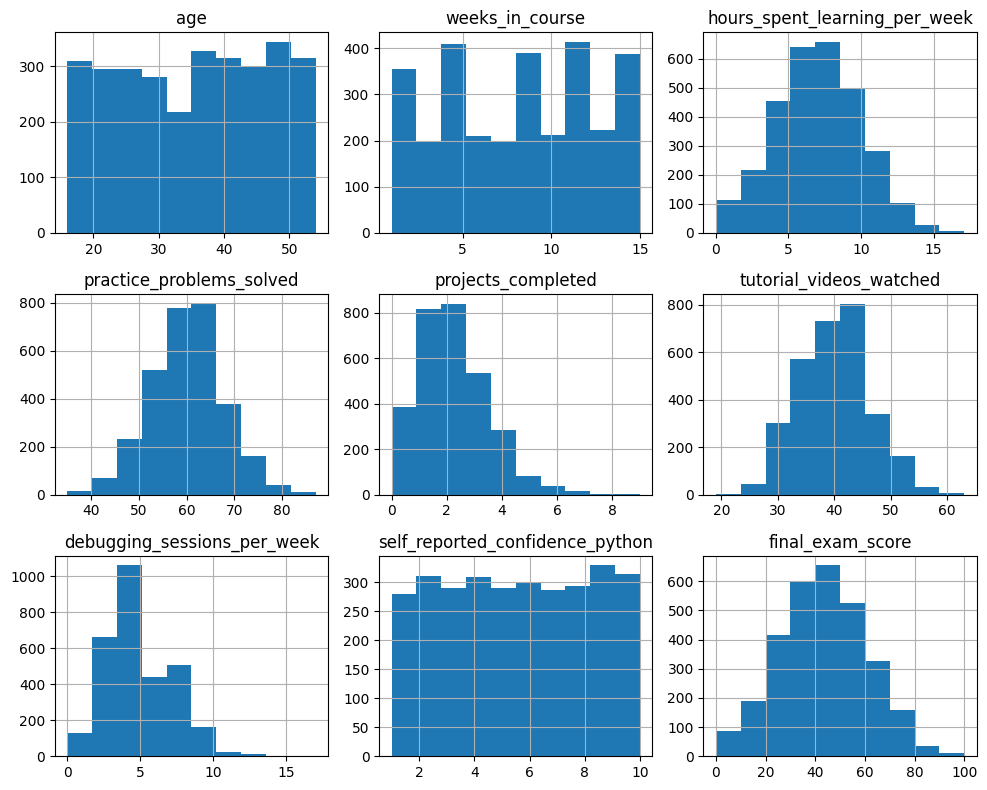

In [15]:
df.drop(columns = ['uses_kaggle', 'participates_in_discussion_forums', 'passed_exam']).select_dtypes(include = np.number).hist(figsize = (10, 8))
plt.tight_layout()
plt.show()

We can see that

* distributions of _age_, _weeks_in_course_ and _self_reported_confidence_python_ are somewhat unimodal - there's no any skews or any particular shapes
* distributions of _hours_spent_learning_per_week_, _practice_problems_solved_, _tutorial_videos_watched_ and _final_exam_score_ look normal as they have that bell shape
* _projects_completed_ and _debugging_sessions_per_week_ have right-skewed distributions 

In [16]:
df.head()

,student_id,age,country,prior_programming_experience,weeks_in_course,hours_spent_learning_per_week,practice_problems_solved,projects_completed,tutorial_videos_watched,uses_kaggle,participates_in_discussion_forums,debugging_sessions_per_week,self_reported_confidence_python,final_exam_score,passed_exam
0,1,54,Pakistan,Beginner,12,12.2,60,1,24,0,1,4,10,53.8,0
1,2,44,Nigeria,Unknown,15,14.2,52,1,32,0,0,5,7,31.9,0
2,3,30,India,Intermediate,5,7.7,71,1,43,0,0,6,3,59.4,0
3,4,23,Nigeria,Beginner,4,5.6,64,2,40,1,0,3,10,58.8,0
4,5,36,UK,Unknown,3,3.5,62,1,47,1,0,3,7,24.8,0


In [17]:
df['country'] \
    .value_counts() \
    .to_frame(name = 'count') \
    .assign(percentage = lambda x: round(x['count'] / x['count'].sum() * 100, 1).astype(str) + '%')

,count,percentage
country,,
Brazil,339,11.3%
Germany,319,10.6%
India,304,10.1%
Other,302,10.1%
USA,298,9.9%
UK,297,9.9%
Indonesia,295,9.8%
Pakistan,294,9.8%
Bangladesh,286,9.5%


Most students are from Brazil and least are from Nigeria.

In [18]:
df['prior_programming_experience'] \
    .value_counts() \
    .to_frame(name = 'count') \
    .assign(percentage = lambda x: round(x['count'] / x['count'].sum() * 100, 1).astype(str) + '%')

,count,percentage
prior_programming_experience,,
Unknown,1062,35.4%
Beginner,1034,34.5%
Intermediate,634,21.1%
Advanced,270,9.0%


34.5% of student are on "Beginner" level in prior programming experience and 35.4% of student did not specify their level. Only 9% of students are on "Advanced" level in  prior programming experience. It means that number of students with no or little prior experience is 4 times larger than students with advanced skills.

In [19]:
df.head()

,student_id,age,country,prior_programming_experience,weeks_in_course,hours_spent_learning_per_week,practice_problems_solved,projects_completed,tutorial_videos_watched,uses_kaggle,participates_in_discussion_forums,debugging_sessions_per_week,self_reported_confidence_python,final_exam_score,passed_exam
0,1,54,Pakistan,Beginner,12,12.2,60,1,24,0,1,4,10,53.8,0
1,2,44,Nigeria,Unknown,15,14.2,52,1,32,0,0,5,7,31.9,0
2,3,30,India,Intermediate,5,7.7,71,1,43,0,0,6,3,59.4,0
3,4,23,Nigeria,Beginner,4,5.6,64,2,40,1,0,3,10,58.8,0
4,5,36,UK,Unknown,3,3.5,62,1,47,1,0,3,7,24.8,0


Let's find out what has minimal final exam score to be in order to pass exam

In [20]:
df.groupby('passed_exam', as_index = 0).agg({'final_exam_score': ['min', 'max']})

passed_exam final_exam_score       
                           min    max
0           0              0.0   59.9
1           1             60.0  100.0

Now it's clear that in order to pass final exam student has to have at least score of 60.

Let's check how many students passed final exam

In [21]:
df['passed_exam']\
    .value_counts() \
    .to_frame(name = 'count') \
    .assign(percentage = lambda x: round(x['count'] / x['count'].sum() * 100, 1).astype(str) + '%')

,count,percentage
passed_exam,,
0,2468,82.3%
1,532,17.7%


82.3% of students could not pass final exam which looks quite bad.

Let's create a list of categorical variables which consists of folliwing variables:

* _country_
* _prior_programming_experience_
* _uses_kaggle_
* _participates_in_discussion_forums_

and use them as segmentation variables.

Now let's explore median final exam score by these segments

In [22]:
df.head()

,student_id,age,country,prior_programming_experience,weeks_in_course,hours_spent_learning_per_week,practice_problems_solved,projects_completed,tutorial_videos_watched,uses_kaggle,participates_in_discussion_forums,debugging_sessions_per_week,self_reported_confidence_python,final_exam_score,passed_exam
0,1,54,Pakistan,Beginner,12,12.2,60,1,24,0,1,4,10,53.8,0
1,2,44,Nigeria,Unknown,15,14.2,52,1,32,0,0,5,7,31.9,0
2,3,30,India,Intermediate,5,7.7,71,1,43,0,0,6,3,59.4,0
3,4,23,Nigeria,Beginner,4,5.6,64,2,40,1,0,3,10,58.8,0
4,5,36,UK,Unknown,3,3.5,62,1,47,1,0,3,7,24.8,0


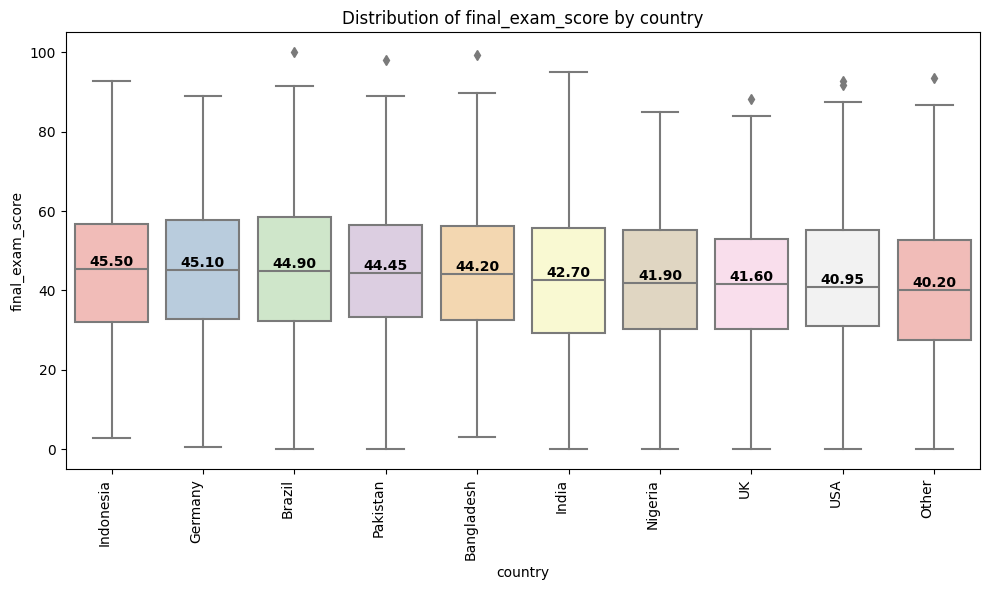

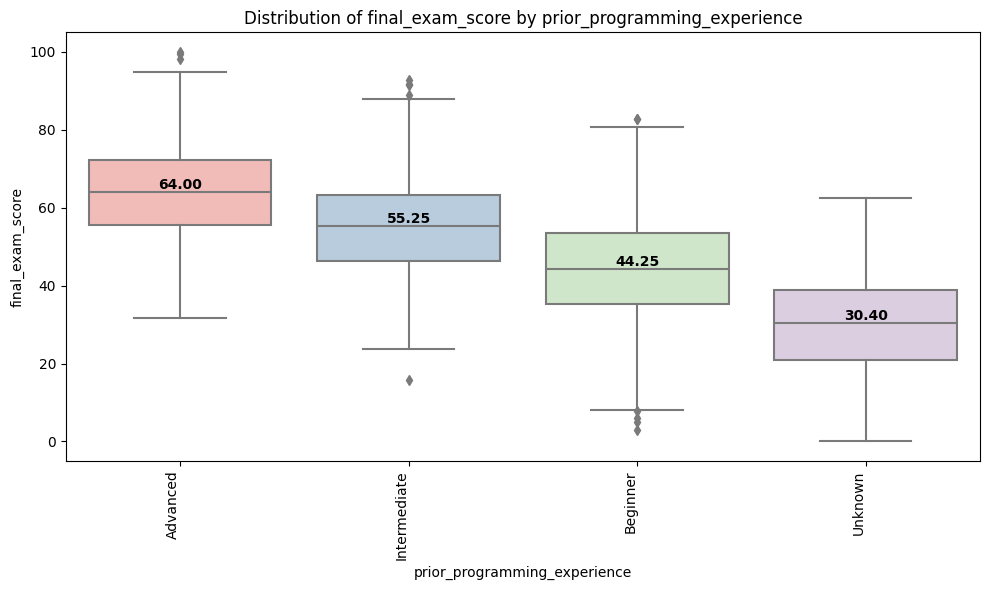

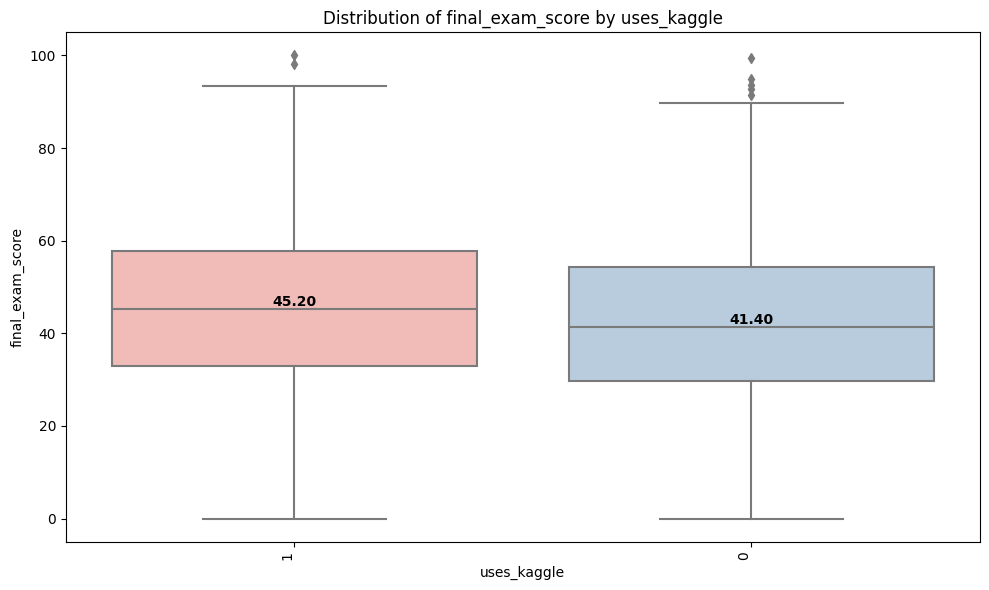

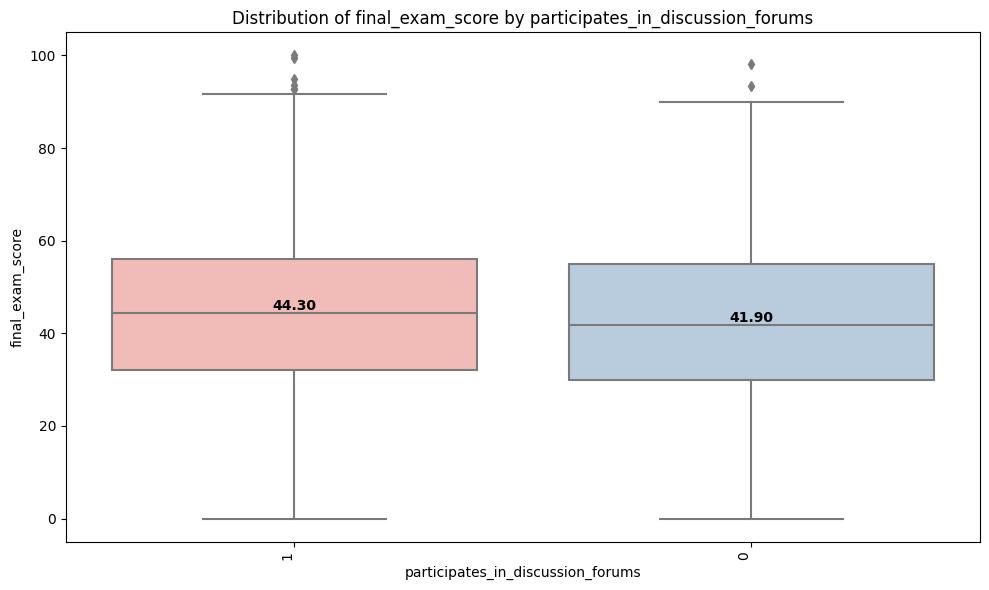

In [23]:
segments = ['country', 'prior_programming_experience', 'uses_kaggle', 'participates_in_discussion_forums']

for segment in segments:

    median_values_by_segments = df.groupby(segment)['final_exam_score'].median()

    order = median_values_by_segments.sort_values(ascending = 0).index.tolist()
    
    plt.figure(figsize = (10, 6))
    ax = sb.boxplot(
        x = segment
        , y = 'final_exam_score' 
        , data = df
        , order = order
        , palette = 'Pastel1'
    )

    for i, category in enumerate(order):
        
        median_val = median_values_by_segments[category]
        
        text = f'{median_val:.2f}'
        
        ax.text(
            x = i
            , y = median_val 
            , s = text
            , ha = 'center'
            , va = 'bottom'
            , fontweight = 'bold' 
            , color = 'black'
            , fontsize = 10
        )
    
    plt.title(f'Distribution of final_exam_score by {segment}')
    plt.xlabel(f'{segment}')
    plt.ylabel('final_exam_score')
    plt.xticks(rotation = 90, ha='right')
    plt.tight_layout()
    plt.show()

* there seem to be 2 groups of countries where 1st group consists of countries like Indonesia, Germany, Brazil, Pakistan and Bangladesh with average final exam score slightly higher (by ~2-3 points) than the rest of the countries
* not surprisingly average value of final exam score is higher for students who had some prior programming experience especially for "Advanced" level. The lowest value is in the group of students with "Unknown" level of prior programming experience (maybe these are students with no prior experience at all)
* students who use kaggle and participate in discussion forum tend to have higher average final exam score

Now let's calculate share of students who passed final exam by segments

In [24]:
df.head()

,student_id,age,country,prior_programming_experience,weeks_in_course,hours_spent_learning_per_week,practice_problems_solved,projects_completed,tutorial_videos_watched,uses_kaggle,participates_in_discussion_forums,debugging_sessions_per_week,self_reported_confidence_python,final_exam_score,passed_exam
0,1,54,Pakistan,Beginner,12,12.2,60,1,24,0,1,4,10,53.8,0
1,2,44,Nigeria,Unknown,15,14.2,52,1,32,0,0,5,7,31.9,0
2,3,30,India,Intermediate,5,7.7,71,1,43,0,0,6,3,59.4,0
3,4,23,Nigeria,Beginner,4,5.6,64,2,40,1,0,3,10,58.8,0
4,5,36,UK,Unknown,3,3.5,62,1,47,1,0,3,7,24.8,0


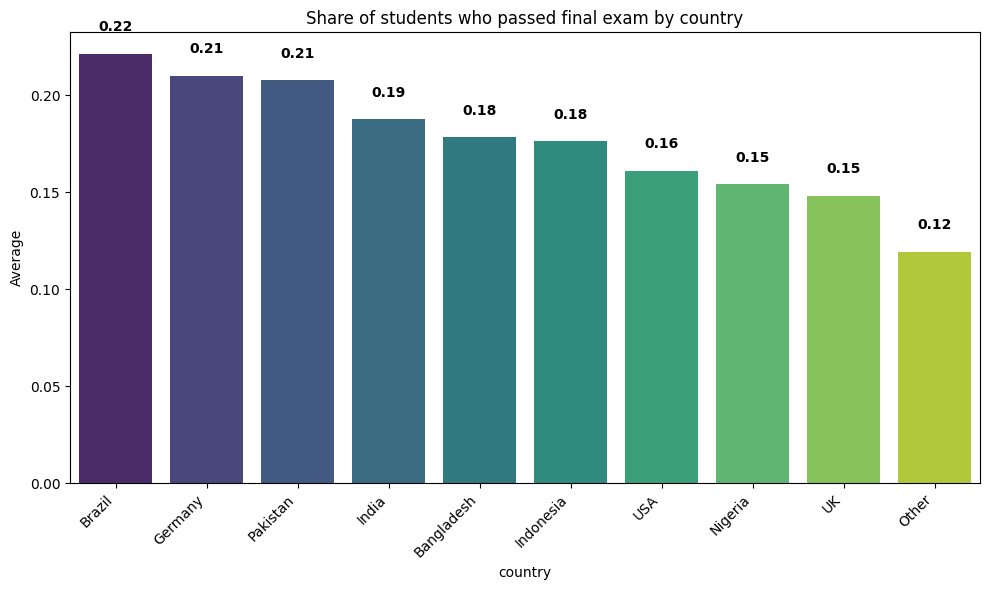

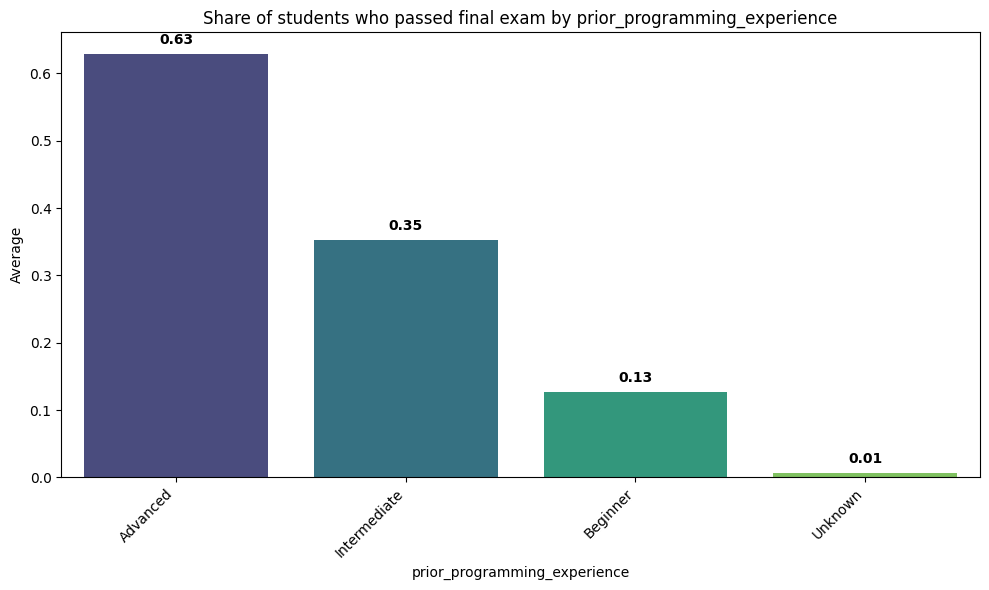

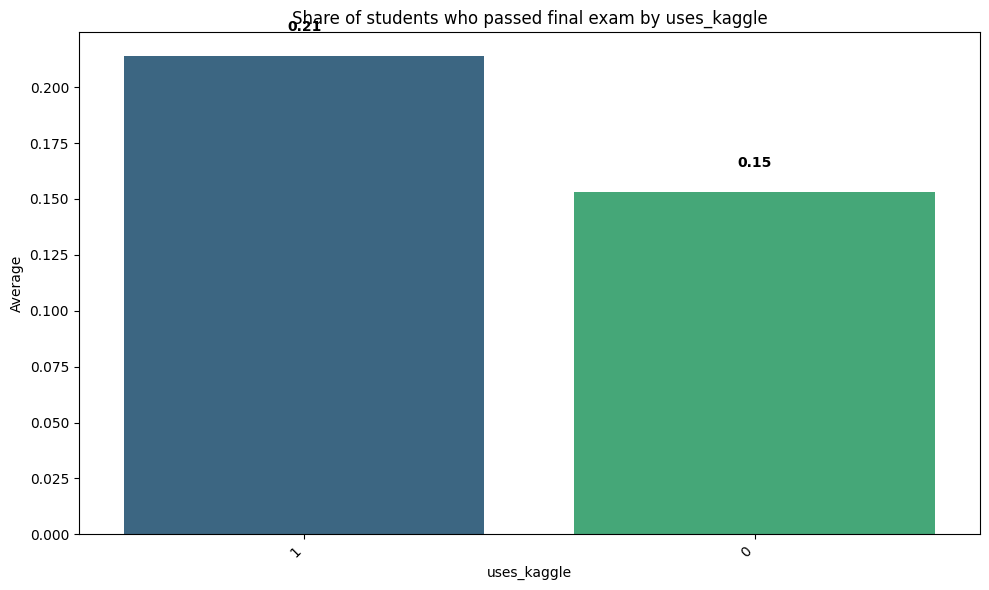

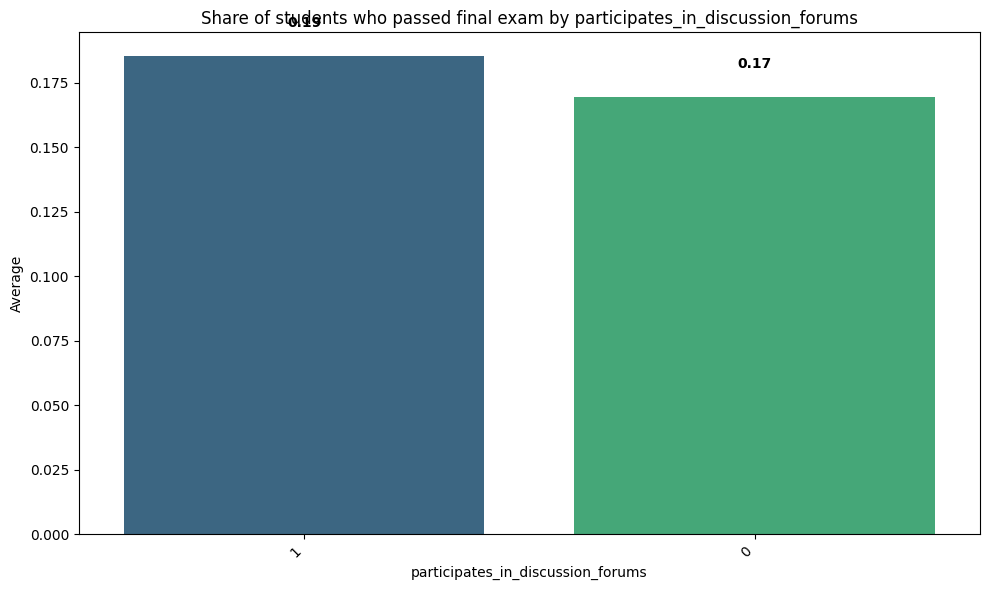

In [25]:
segments = ['country', 'prior_programming_experience', 'uses_kaggle', 'participates_in_discussion_forums']

for segment in segments:
    
    avg_values_by_segments = df.groupby(segment, as_index = 0).agg(avg_passed_exam = ('passed_exam', 'mean'))#['passed_exam'].mean()
    
    avg_values_by_segments = avg_values_by_segments.sort_values(by = 'avg_passed_exam', ascending = False)
    
    order = avg_values_by_segments[segment].tolist()

    plt.figure(figsize = (10, 6))
    
    ax = sb.barplot(
        x = segment
        , y = 'avg_passed_exam'
        , data = avg_values_by_segments 
        , order = order 
        , palette = 'viridis' 
    )

    for p in ax.patches:

        height = p.get_height()
        
        text = f'{height:.2f}'
        
        ax.text(
            x = p.get_x() + p.get_width() / 2.
            , y = height + 0.01                 
            , s = text                          
            , ha = 'center'                     
            , va = 'bottom'                     
            , fontweight = 'bold' 
            , color = 'black'
            , fontsize = 10
        )
    
    plt.title(f'Share of students who passed final exam by {segment}')
    plt.xlabel(f'{segment}')
    plt.ylabel('Average')
    plt.xticks(rotation = 45, ha = 'right')
    plt.tight_layout()
    plt.show()
    

* Brazil has 22% of students who passed final exam which is the best result among all countries in our data. The worst results are from UK and Other countires with values of 15% and 12% respectively
* "Advanced" level of prior programming experience show 63% of students who passed final exam, "Intermediate" level - 35%. The worst results is 1% from students with "Unknown" level of experience

Let's create correlation matrix for numerical characteristics of students

In [26]:
df.head()

,student_id,age,country,prior_programming_experience,weeks_in_course,hours_spent_learning_per_week,practice_problems_solved,projects_completed,tutorial_videos_watched,uses_kaggle,participates_in_discussion_forums,debugging_sessions_per_week,self_reported_confidence_python,final_exam_score,passed_exam
0,1,54,Pakistan,Beginner,12,12.2,60,1,24,0,1,4,10,53.8,0
1,2,44,Nigeria,Unknown,15,14.2,52,1,32,0,0,5,7,31.9,0
2,3,30,India,Intermediate,5,7.7,71,1,43,0,0,6,3,59.4,0
3,4,23,Nigeria,Beginner,4,5.6,64,2,40,1,0,3,10,58.8,0
4,5,36,UK,Unknown,3,3.5,62,1,47,1,0,3,7,24.8,0


In [27]:
df_corr = df.drop(columns = ['uses_kaggle', 'participates_in_discussion_forums', 'passed_exam']).select_dtypes(include = np.number)

corr_matrix = df_corr.corr()

corr_matrix

,age,weeks_in_course,hours_spent_learning_per_week,practice_problems_solved,projects_completed,tutorial_videos_watched,debugging_sessions_per_week,self_reported_confidence_python,final_exam_score
age,1.000000,0.012735,-0.018902,-0.004112,-0.007976,-0.009739,-0.032683,-0.012651,-0.023117
weeks_in_course,0.012735,1.000000,-0.003977,0.008241,0.021097,0.004265,0.006126,0.013991,0.008417
hours_spent_learning_per_week,-0.018902,-0.003977,1.000000,-0.010991,0.012446,0.017746,-0.009773,-0.001074,0.365296
practice_problems_solved,-0.004112,0.008241,-0.010991,1.000000,-0.026667,0.018967,0.013717,-0.006042,0.081669
projects_completed,-0.007976,0.021097,0.012446,-0.026667,1.000000,-0.017340,-0.034702,0.008259,0.352102
tutorial_videos_watched,-0.009739,0.004265,0.017746,0.018967,-0.017340,1.000000,-0.012645,0.031414,0.028922
debugging_sessions_per_week,-0.032683,0.006126,-0.009773,0.013717,-0.034702,-0.012645,1.000000,0.007817,0.092876
self_reported_confidence_python,-0.012651,0.013991,-0.001074,-0.006042,0.008259,0.031414,0.007817,1.000000,0.282321
final_exam_score,-0.023117,0.008417,0.365296,0.081669,0.352102,0.028922,0.092876,0.282321,1.000000


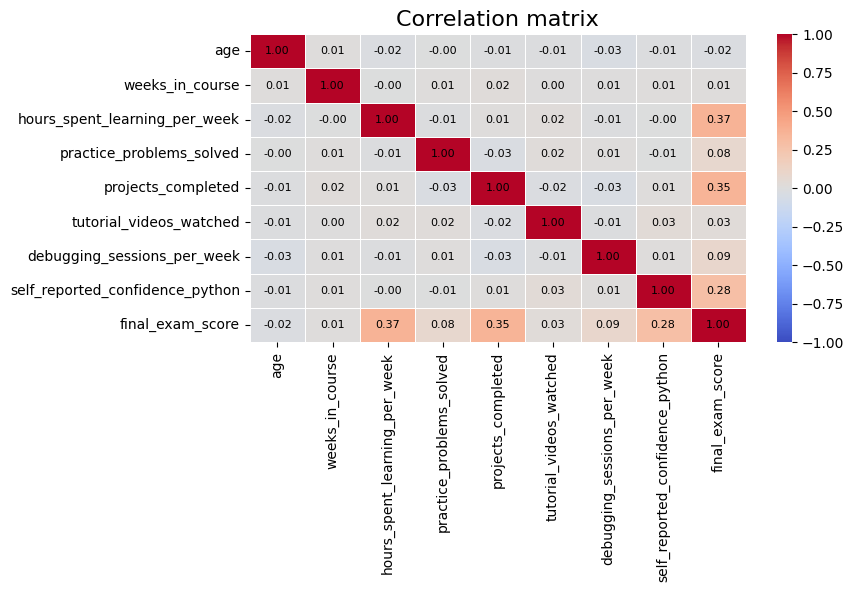

In [28]:
plt.figure(figsize = (8, 4))

# Построение тепловой карты
ax = sb.heatmap(
    corr_matrix
    #, annot = True
    , cmap = 'coolwarm'
    , fmt = ".2f"
    , linewidths = 0.5
    , cbar = True
    , vmin = -1
    , vmax = 1
)

# Manual adding values to the chart since annot = True argument doesn't work as expected
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        ax.text(j + 0.5, i + 0.5, f"{corr_matrix.iloc[i, j]:.2f}", 
                ha = 'center', va = 'center', color = 'black', fontsize = 8)

plt.title('Correlation matrix', fontsize = 16)

plt.show()

Final exam score moderately correlates with 
* self reported confidence in Python
* number of completed projects
* hours spent learning per week

Let's visualize relationship between _final_exam_score_ and variables above

In [29]:
df.head()

,student_id,age,country,prior_programming_experience,weeks_in_course,hours_spent_learning_per_week,practice_problems_solved,projects_completed,tutorial_videos_watched,uses_kaggle,participates_in_discussion_forums,debugging_sessions_per_week,self_reported_confidence_python,final_exam_score,passed_exam
0,1,54,Pakistan,Beginner,12,12.2,60,1,24,0,1,4,10,53.8,0
1,2,44,Nigeria,Unknown,15,14.2,52,1,32,0,0,5,7,31.9,0
2,3,30,India,Intermediate,5,7.7,71,1,43,0,0,6,3,59.4,0
3,4,23,Nigeria,Beginner,4,5.6,64,2,40,1,0,3,10,58.8,0
4,5,36,UK,Unknown,3,3.5,62,1,47,1,0,3,7,24.8,0


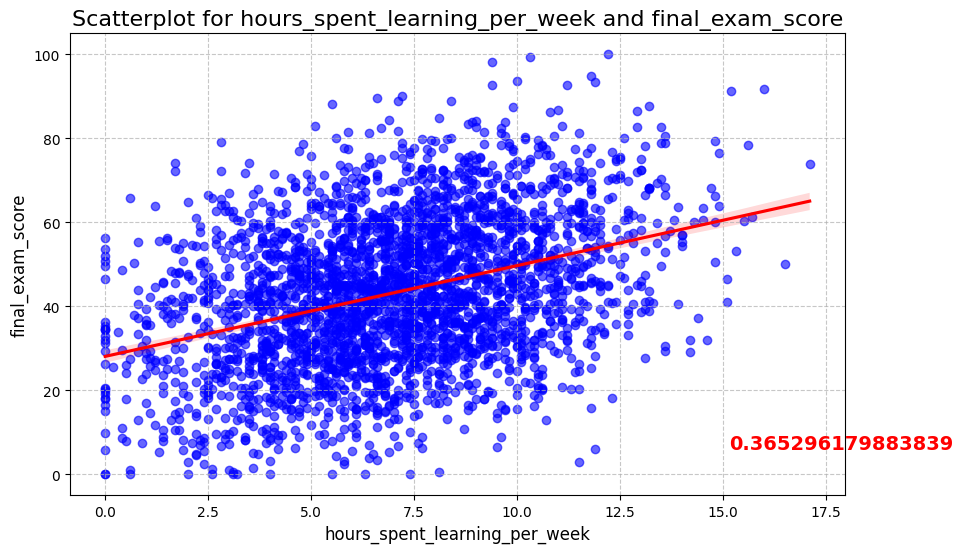

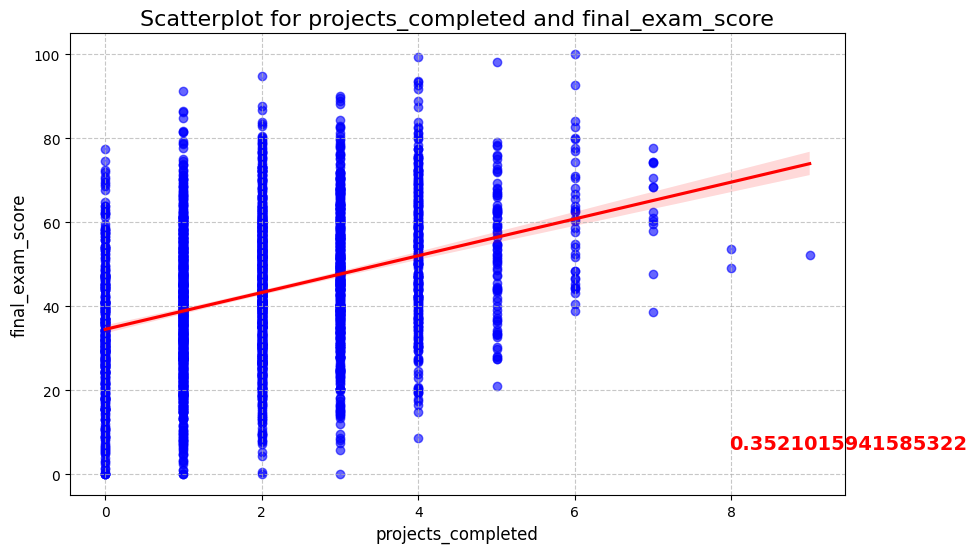

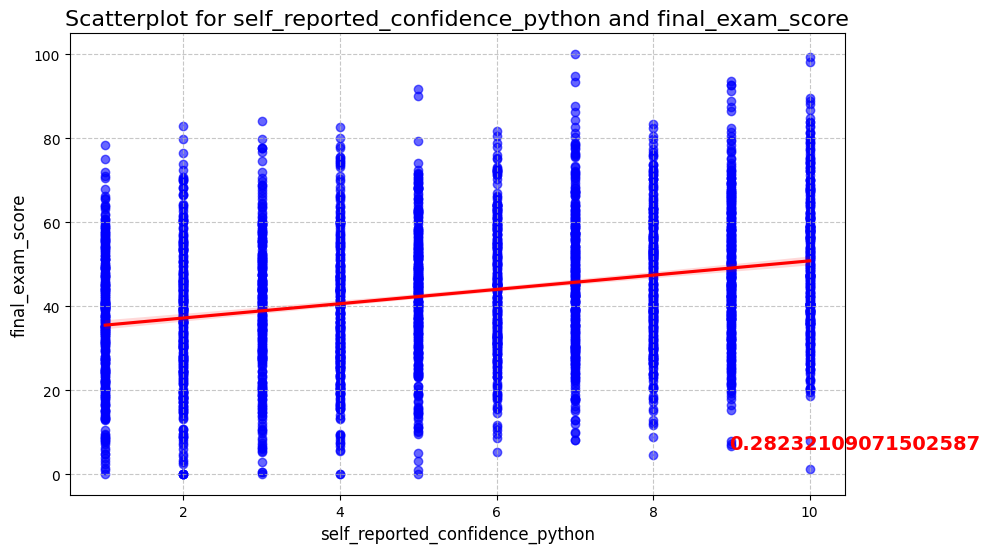

In [30]:
reg_vars = ['hours_spent_learning_per_week', 'projects_completed', 'self_reported_confidence_python']

for var in reg_vars:

    corr_coef = df[var].corr(df['final_exam_score'])

    plt.figure(figsize = (10, 6))
    
    sb.regplot(
        x = var 
        , y = 'final_exam_score'
        , data = df
        , ci = 95
        , scatter_kws = {'alpha': 0.6, 'color': 'blue'}
        , line_kws={'color': 'red'}
    )
    
    plt.text(
        x = 0.85 
        , y = 0.10 
        , s = corr_coef
        , transform = plt.gca().transAxes
        , fontsize = 14 
        , fontweight = 'bold'
        , color = 'red'
    )
    
    plt.title(f'Scatterplot for {var} and final_exam_score', fontsize = 16)
    plt.xlabel(f'{var}', fontsize = 12)
    plt.ylabel('final_exam_score', fontsize = 12)
    
    plt.grid(True, linestyle = '--', alpha = 0.7)
    plt.show()

There's moderate linear relationship.

Let's try to predict final exam score using several methods

In [31]:
df.head()

,student_id,age,country,prior_programming_experience,weeks_in_course,hours_spent_learning_per_week,practice_problems_solved,projects_completed,tutorial_videos_watched,uses_kaggle,participates_in_discussion_forums,debugging_sessions_per_week,self_reported_confidence_python,final_exam_score,passed_exam
0,1,54,Pakistan,Beginner,12,12.2,60,1,24,0,1,4,10,53.8,0
1,2,44,Nigeria,Unknown,15,14.2,52,1,32,0,0,5,7,31.9,0
2,3,30,India,Intermediate,5,7.7,71,1,43,0,0,6,3,59.4,0
3,4,23,Nigeria,Beginner,4,5.6,64,2,40,1,0,3,10,58.8,0
4,5,36,UK,Unknown,3,3.5,62,1,47,1,0,3,7,24.8,0


## Linear Regression

In [32]:
# Encoding categorical variables in a dummy way
df_encoded = pd.get_dummies(df.drop(columns = 'student_id'), drop_first = 1)

# independent variables
X = df_encoded.drop(columns = ['final_exam_score', 'passed_exam'])

# dependent variable
y = df_encoded['final_exam_score']

X.head()

,age,weeks_in_course,hours_spent_learning_per_week,practice_problems_solved,projects_completed,tutorial_videos_watched,uses_kaggle,participates_in_discussion_forums,debugging_sessions_per_week,self_reported_confidence_python,country_Brazil,country_Germany,country_India,country_Indonesia,country_Nigeria,country_Other,country_Pakistan,country_UK,country_USA,prior_programming_experience_Beginner,prior_programming_experience_Intermediate,prior_programming_experience_Unknown
0,54,12,12.2,60,1,24,0,1,4,10,False,False,False,False,False,False,True,False,False,True,False,False
1,44,15,14.2,52,1,32,0,0,5,7,False,False,False,False,True,False,False,False,False,False,False,True
2,30,5,7.7,71,1,43,0,0,6,3,False,False,True,False,False,False,False,False,False,False,True,False
3,23,4,5.6,64,2,40,1,0,3,10,False,False,False,False,True,False,False,False,False,True,False,False
4,36,3,3.5,62,1,47,1,0,3,7,False,False,False,False,False,False,False,True,False,False,False,True


Slope: -0.005
Intercept: 5.850
MSE: 63.018
RMSE: 7.94
R²: 0.792


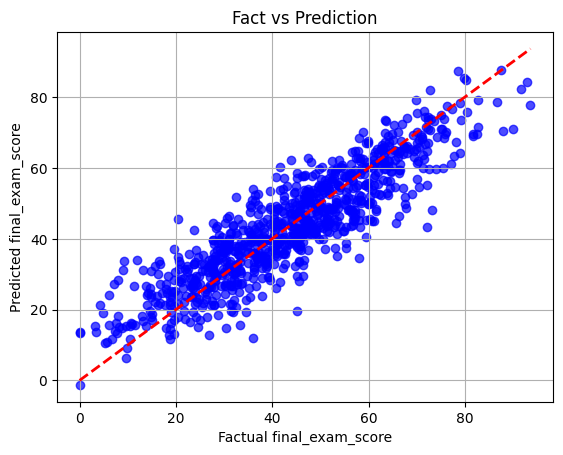

In [33]:
np.random.seed(42)

# Splitting data into train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Initializing model
lr_model = LinearRegression()

# Fitting model
lr_model.fit(X_train, y_train)

# Making predictions
y_pred = lr_model.predict(X_test)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# R-squared
r2 = r2_score(y_test, y_pred)

print(f"Slope: {lr_model.coef_[0]:.3f}")

print(f"Intercept: {lr_model.intercept_:.3f}")

print(f"MSE: {mse:.3f}")

print(f"RMSE: {rmse:.2f}")

print(f"R²: {r2:.3f}")

plt.scatter(y_test, y_pred, color = 'blue', alpha = 0.7)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw = 2)

plt.xlabel('Factual final_exam_score')

plt.ylabel('Predicted final_exam_score')

plt.title('Fact vs Prediction')

plt.grid(True)

plt.show()

We have nice results
* R**2 value of 0.792 means that our model explains 79% of variablity in final exam scores
* RMSE value of 7.94 means that on average we have error about 8 point of final exam scores

Our current model uses all independent variables. Let's check the coefficients of our variables abd to do that we need to scale our variables

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)  

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

lr_model_scaled = LinearRegression()

lr_model_scaled.fit(X_train_scaled, y_train)

# Making predictions
y_pred_scaled = lr_model_scaled.predict(X_test_scaled)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred_scaled)

# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred_scaled))

# R-squared
r2 = r2_score(y_test, y_pred_scaled)

print(f"Slope: {lr_model_scaled.coef_[0]:.3f}")

print(f"Intercept: {lr_model_scaled.intercept_:.3f}")

print(f"MSE: {mse:.3f}")

print(f"RMSE: {rmse:.2f}")

print(f"R²: {r2:.3f}")

# plt.scatter(y_test, y_pred_scaled, color = 'blue', alpha = 0.7)

# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw = 2)

# plt.xlabel('Factual final_exam_score')

# plt.ylabel('Predicted final_exam_score')

# plt.title('Fact vs Prediction')

# plt.grid(True)

# plt.show()

Slope: -0.056
Intercept: 43.184
MSE: 63.018
RMSE: 7.94
R²: 0.792


In [35]:
# Model coefficients
coef = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': lr_model_scaled.coef_
})

coef['abs_coef'] = abs(coef['coefficient'])
coef.sort_values(by = 'abs_coef', ascending = False)

,feature,coefficient,abs_coef
21,prior_programming_experience_Unknown,-16.073275,16.073275
19,prior_programming_experience_Beginner,-9.209750,9.209750
2,hours_spent_learning_per_week,6.245669,6.245669
4,projects_completed,5.799003,5.799003
9,self_reported_confidence_python,4.793014,4.793014
20,prior_programming_experience_Intermediate,-3.554711,3.554711
3,practice_problems_solved,1.962022,1.962022
8,debugging_sessions_per_week,1.808127,1.808127
6,uses_kaggle,1.626075,1.626075
7,participates_in_discussion_forums,1.314524,1.314524


Let's remove variables with coefficient < 1 and see how it affects metrics like RMSE and R**2

In [36]:
coef = coef[coef['abs_coef'] > 1]

selected_features = coef['feature'].tolist()

X_train_selected = X_train[selected_features]

X_test_selected = X_test[selected_features]

lr_model_selected = LinearRegression()

lr_model_selected.fit(X_train_selected, y_train)

# Making predictions
y_pred_selected = lr_model_selected.predict(X_test_selected)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred_selected)

# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred_selected))

# R-squared
r2 = r2_score(y_test, y_pred_selected)

print(f"Slope: {lr_model_selected.coef_[0]:.3f}")

print(f"Intercept: {lr_model_selected.intercept_:.3f}")

print(f"MSE: {mse:.3f}")

print(f"RMSE: {rmse:.2f}")

print(f"R²: {r2:.3f}")

Slope: 2.142
Intercept: 8.638
MSE: 62.691
RMSE: 7.92
R²: 0.793


Let's create a function to compare metrics between models

In [37]:
metrics_list = []

def add_metrics(model_name, y_true, y_pred, n_features):
    
    metrics_list.append({
        'Model': model_name
        , 'R²': r2_score(y_true, y_pred)
        , 'RMSE': np.sqrt(mean_squared_error(y_true, y_pred))
        , 'Number of features': n_features
    })

    # metrics_df = pd.DataFrame(metrics_list)
    
    # return metrics_df

add_metrics('Linear Regression (All features)', y_test, y_pred, X_test.shape[1])

add_metrics('Linear Regression (Selected features)', y_test, y_pred_selected, X_test_selected.shape[1])

metrics_df = pd.DataFrame(metrics_list)

metrics_df = metrics_df.round(3)

# metrics_df = metrics_df.sort_values(by = 'R²', ascending = False).reset_index(drop=True)

metrics_df.sort_values(by = 'R²', ascending = False).reset_index(drop = True)

,Model,R²,RMSE,Number of features
0,Linear Regression (Selected features),0.793,7.918,10
1,Linear Regression (All features),0.792,7.938,22


We can see that removing features with week effect on target doesn't spoil linear regression performance but makes it simpler.

Now let's apply linear regression model again but using statsmodels library just to see all summary statistics like p-value

In [38]:
import statsmodels.api as sm

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = X_train.columns, index = X_train.index)

X_train_scaled_df = sm.add_constant(X_train_scaled_df) 

lr_model_scaled_sm = sm.OLS(y_train, X_train_scaled_df).fit()

lr_model_scaled_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       final_exam_score   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     364.4
Date:                Thu, 11 Dec 2025   Prob (F-statistic):               0.00
Time:                        10:51:58   Log-Likelihood:                -7312.9
No. Observations:                2100   AIC:                         1.467e+04
Df Residuals:                    2077   BIC:                         1.480e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        43.1839      0.173    249.985      0.000      42.845      43.523
age                                          -0.0562      0.173     -0.324      0.746      -0.396       0.284
weeks_in_course                              -0.1359      0.174     -0.782      0.434      -0.476       0.205
hours_spent_learning_per_week                 6.2457      0.174     35.998      0.000       5.905       6.586
practice_problems_solved                      1.9620      0.174     11.301      0.000       1.622       2.303
projects_completed                            5.7990      0.174     33.355      0.000       5.458       6.140
tutorial_videos_watched                       0.6573      0.173      3.794      0.000       0.318       0.997
uses_kaggle                                   1.6261      0.174      9.366      0.000       1.286       1.967
participates_in_discussion_forums             1.3145      0.174      7.565      0.000       0.974       1.655
debugging_sessions_per_week                   1.8081      0.174     10.406      0.000       1.467       2.149
self_reported_confidence_python               4.7930      0.173     27.652      0.000       4.453       5.133
country_Brazil                                0.0850      0.237      0.359      0.720      -0.379       0.549
country_Germany                              -0.1274      0.235     -0.543      0.587      -0.588       0.333
country_India                                -0.4878      0.235     -2.080      0.038      -0.948      -0.028
country_Indonesia                            -0.4003      0.228     -1.755      0.079      -0.848       0.047
country_Nigeria                              -0.1475      0.225     -0.655      0.513      -0.589       0.294
country_Other                                -0.5554      0.233     -2.387      0.017      -1.012      -0.099
country_Pakistan                             -0.1589      0.230     -0.691      0.489      -0.610       0.292
country_UK                                    0.0172      0.233      0.074      0.941      -0.439       0.474
country_USA                                  -0.0419      0.231     -0.181      0.856      -0.496       0.412
prior_programming_experience_Beginner        -9.2098      0.313    -29.402      0.000      -9.824      -8.595
prior_programming_experience_Intermediate    -3.5547      0.287    -12.387      0.000      -4.117      -2.992
prior_programming_experience_Unknown        -16.0733      0.315    -51.096      0.000     -16.690     -15.456
==============================================================================
Omnibus:                        0.583   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.747   Jarque-Bera (JB):        

## Random Forest

In [44]:
rf_model = RandomForestRegressor(
    n_estimators = 300
    , max_depth = None
    , random_state = 42
    , n_jobs = -1
)

rf_model.fit(X_train, y_train)

y_pred_rf_def = rf_model.predict(X_test)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred_rf)

# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf_def))

# R-squared
r2 = r2_score(y_test, y_pred_rf_def)

print(f"MSE: {mse:.3f}")

print(f"RMSE: {rmse:.2f}")

print(f"R²: {r2:.3f}")

MSE: 79.807
RMSE: 8.97
R²: 0.735


In the cell above we used mostly default parameters. Now let's try to tune the model with arbitrary values for parameters like n_estimators, max_depth, min_samples_leaf, min_samples_split

In [41]:
for n in range(10, 31, 5):
    print(n)

10
15
20
25
30


In [43]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
    , 'max_depth': [10, 15, 20, 25, 30, None]
    , 'min_samples_leaf': [1, 2, 5, 10]
    , 'min_samples_split': [2, 5, 10, 20]
}

rf_model = RandomForestRegressor(random_state = 42, n_jobs = -1)

search = RandomizedSearchCV(
    estimator = rf_model
    , param_distributions = param_dist
    , n_iter = 60
    , cv = 5
    , scoring = 'r2'
    , random_state = 42
    , n_jobs = -1
    , verbose = 1
)

search.fit(X_train, y_train)

print("Best params:", search.best_params_)
print("Best R² on cv:", search.best_score_.round(4))

best_model = search.best_estimator_

y_pred_rf = best_model.predict(X_test)

print(f"R²: {r2_score(y_test, y_pred_rf):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.2f}")

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best params: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 25}
Best R² on cv: 0.7269
R²: 0.7368
RMSE: 8.93


In [45]:
add_metrics('Random Forest (Default)', y_test, y_pred_rf_def, X_test.shape[1])

add_metrics('Random Forest (Tuned)', y_test, y_pred_rf, X_test.shape[1])

metrics_df = pd.DataFrame(metrics_list)

metrics_df = metrics_df.round(3)

# metrics_df = metrics_df.sort_values(by = 'R²', ascending = False).reset_index(drop=True)

metrics_df.sort_values(by = 'R²', ascending = False).reset_index(drop = True)

,Model,R²,RMSE,Number of features
0,Linear Regression (Selected features),0.793,7.918,10
1,Linear Regression (All features),0.792,7.938,22
2,Random Forest (Tuned),0.737,8.933,22
3,Random Forest (Default),0.735,8.968,22


Linear Regression performs better than Random Forest. Also tuning params in Random Forest did not boost performance significantly.

## XGBoost

In [51]:
xgb_model = XGBRegressor(
    n_estimators = 1000
    , learning_rate = 0.05
    , max_depth = 6
    , subsample = 0.8
    , colsample_bytree = 0.8
    , random_state = 42
    , n_jobs = -1
    , tree_method = 'hist'
    , early_stopping_rounds = 50
    , eval_metric = 'rmse'
)

xgb_model.fit(X_train, y_train, eval_set = [(X_test, y_test)], verbose = 100)

y_pred_xgb_def = xgb_model.predict(X_test)

print(f"R²:  {r2_score(y_test, y_pred_xgb_def):.4f}")

print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_xgb_def)):.3f}")

print(f"N trees learnt: {xgb_model.best_iteration}")

[0]	validation_0-rmse:16.90461
[100]	validation_0-rmse:8.63055
[162]	validation_0-rmse:8.64577
R²:  0.7557
RMSE: 8.607
N trees learnt: 112


Model with default params shows reasonably good results. Let's try to find combination of params that performs best

In [52]:
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
    , 'learning_rate': [0.01, 0.05, 0.1]
    , 'max_depth': [3, 4, 5, 6, 7, 8]
    , 'min_child_weight': [1, 3, 5, 7]
    , 'subsample': [0.6, 0.8, 1.0]
    , 'colsample_bytree': [0.6, 0.8, 1.0]
    , 'reg_alpha': [0, 0.1, 1.0]
    , 'reg_lambda': [1.0, 1.5, 2.0]
}

xgb_search = RandomizedSearchCV(
    XGBRegressor(random_state = 42, n_jobs = -1, early_stopping_rounds = 50, eval_metric = 'rmse')
    , param_distributions = param_dist
    , n_iter = 80
    , cv = 5
    , scoring = 'r2'
    , random_state = 42
    , n_jobs = -1
    , verbose = 1
)

xgb_search.fit(X_train, y_train, eval_set = [(X_test, y_test)], verbose = False)

print("Best params:", xgb_search.best_params_)

print("Best R² on CV:", xgb_search.best_score_.round(4))

best_xgb = xgb_search.best_estimator_

y_pred_xgb = best_xgb.predict(X_test)

print(f"Final test R²: {r2_score(y_test, y_pred_xgb):.4f}")

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best params: {'subsample': 0.8, 'reg_lambda': 2.0, 'reg_alpha': 1.0, 'n_estimators': 700, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.6}
Best R² on CV: 0.7668
Final test R²: 0.7656


In [50]:
metrics_df

,Model,R²,RMSE,Number of features
0,Linear Regression (All features),0.792,7.938,22
1,Linear Regression (Selected features),0.793,7.918,10
2,Random Forest (Default),0.735,8.968,22
3,Random Forest (Tuned),0.737,8.933,22


In [53]:
add_metrics('XGBoost (Default)', y_test, y_pred_xgb_def, X_test.shape[1])

add_metrics('XGBoost (Tuned)', y_test, y_pred_xgb, X_test.shape[1])

metrics_df = pd.DataFrame(metrics_list)

metrics_df = metrics_df.round(3)

# metrics_df = metrics_df.sort_values(by = 'R²', ascending = False).reset_index(drop=True)

metrics_df.sort_values(by = 'R²', ascending = False).reset_index(drop = True)

,Model,R²,RMSE,Number of features
0,Linear Regression (Selected features),0.793,7.918,10
1,Linear Regression (All features),0.792,7.938,22
2,XGBoost (Tuned),0.766,8.431,22
3,XGBoost (Default),0.756,8.607,22
4,Random Forest (Tuned),0.737,8.933,22
5,Random Forest (Default),0.735,8.968,22


Tuning XGBoost model does not really boosts performance - metrics are almost the same as the model with default args.

## Conclusions on modeilling

We compared 3 different models to predict final exam score of the student based on several factors. We took R**2 as a comparison metric. We can conclude that

* the best model is *Linear Regression* with selected features that mostly affects our target variable
* *Linear Regression* with all and selected features still performs better than *Random Forest* of *XGBoost* and it doesn't matter if they are tuned of default
* the worst performing model is *Random Forest*

## Final conclusions

1. Final exam score is not affected by the country of a student
2. Factors that affect final exam score are mostly
   * prior programming experience of a student
   * reported confidence in python
   * amount of time spent on learning per week
   * number of completed projects
3. There is moderate linear relationship between final exam score and factors above
4. The best model to predict final exam score is **Linear Regression**